# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#import libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json
import tweepy

In [2]:
#read the csv file
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#download tweet image prediction
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [4]:
#save the file
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

#read the image preduction file
image_predict_df = pd.read_csv('image_predictions.tsv', sep = '\t')
image_predict_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
#download Twitter API
#I tried twitter API but it didn't allow me to download so I had to use the one provided by Udacity
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)

In [6]:
#save the file as tweet_json.txt
with open('tweet_json.txt', mode = 'wb') as file:
    file.write(response.content)


In [7]:
#read the json file into a dataframe
json_df = []
with open('tweet_json.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        parsed_json = json.loads(line)
        json_df.append({'tweet_id': parsed_json['id'],
                        'retweet_count': parsed_json['retweet_count'],
                        'favorite_count': parsed_json['favorite_count']})
        
json_df = pd.DataFrame(json_df, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

json_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [8]:
#quick overview of the dataframe
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
#quick overview of data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

There is no missing tweet_id.

In [10]:
df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

no duplicate tweet_id

In [11]:
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [35]:
#quick overview of rating_numerator counts
df.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
960       1
666       1
420       2
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        2
60        1
50        1
45        1
44        1
27        1
26        1
24        1
20        1
17        1
15        2
14       54
13      351
12      558
11      464
10      461
9       158
8       102
7        55
6        32
5        37
4        17
3        19
2         9
1         9
0         2
Name: rating_numerator, dtype: int64

In [12]:
#quick overview of rating_denominator counts
df.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
df.retweeted_status_id.value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
8.780576e+17    1
7.320056e+17    1
7.186315e+17    1
6.732953e+17    1
7.914070e+17    1
8.447048e+17    1
7.862340e+17    1
8.685523e+17    1
7.504293e+17    1
8.327664e+17    1
6.690004e+17    1
6.873173e+17    1
7.638376e+17    1
7.815247e+17    1
8.092201e+17    1
8.000650e+17    1
8.174239e+17    1
8.001414e+17    1
7.909461e+17    1
7.867091e+17    1
8.406323e+17    1
8.688804e+17    1
7.869631e+17    1
7.733088e+17    1
8.222448e+17    1
               ..
6.816941e+17    1
7.899865e+17    1
7.939622e+17    1
6.800555e+17    1
7.128090e+17    1
8.164506e+17    1
6.769365e+17    1
6.675487e+17    1
8.083449e+17    1
7.626999e+17    1
6.678667e+17    1
8.479710e+17    1
6.820881e+17    1
8.352641e+17    1
7.761133e+17    1
7.902771e+17    1
6.675484e+17    1
7.677549e+17    1
8.782815e+17    1
8.663350e+17    1
7.399792e+17    1
7.403732e+17    1
8.395493e+17    1
7.001438e+17    1
8.482894e+

In [17]:
df.retweeted_status_user_id.value_counts()

4.196984e+09    156
4.296832e+09      2
5.870972e+07      1
6.669901e+07      1
4.119842e+07      1
7.475543e+17      1
7.832140e+05      1
7.266347e+08      1
4.871977e+08      1
5.970642e+08      1
4.466750e+07      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
7.874618e+17      1
3.638908e+08      1
5.128045e+08      1
8.117408e+08      1
1.732729e+09      1
1.960740e+07      1
1.547674e+08      1
3.410211e+08      1
7.124572e+17      1
2.804798e+08      1
1.950368e+08      1
Name: retweeted_status_user_id, dtype: int64

In [14]:
df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [15]:
df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [16]:
df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [17]:
df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [23]:
#quick overview of image_predict_df
image_predict_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
image_predict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


No missing tweet_id

In [19]:
image_predict_df.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

There are duplicate jpg_url

In [20]:
image_predict_df.jpg_url.duplicated().sum()

66

In [40]:
image_predict_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
beagle                        18
teddy                         18
Shetland_sheepdog             18
Eskimo_dog                    18
Maltese_dog                   18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [21]:
image_predict_df.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Eskimo_dog                         27
collie                             27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
toy_terrier                        20
chow                               20
miniature_pinscher                 20
malinois                           20
Samoyed                            20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [42]:
image_predict_df.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
toy_poodle                        29
Pekinese                          29
Pomeranian                        29
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
Pembroke                          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
b

In [22]:
#overview json dataframe
json_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [23]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


no null tweet_id

In [24]:
json_df.nunique()

tweet_id          2354
retweet_count     1724
favorite_count    2007
dtype: int64

No duplicate tweet_id 

### Quality issues
Below is the list of quality issue I've found after accessing the files from Python programmatically and and Excel visually.

1.Timestamp should be datetime instead of string.

2. Rating numerator has super high values

3.Rating denominator should be 10, but the column has some value out of that range

4.souces are in html format

5.retweet values need to be removed

6.p1, p2, p3 have some are not even dog breeds

7.duplicate url

8.inconsistent capitalization in p1, p2, and p3 column

### Tidiness issues
1.df doesn't need in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, and retweeted_status_timestamp column

2.4 columns for dog stage. They should be combined into 1 column

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [25]:
# Make copies of original pieces of data
cleaned_df = df.copy()
cleaned_image_df = image_predict_df.copy()
cleaned_json_df = json_df.copy()

### Issue #1: Timestamp should be datetime instead of string.

#### Define: Timestamp should be converted to datetime for the correct data type

#### Code

In [26]:
cleaned_df['timestamp'] = pd.to_datetime(cleaned_df['timestamp'])

#### Test

In [27]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Issue #2: Rating numerator has super high values

#### Define: abnormal values will be removed

#### Code

In [28]:
cleaned_df.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
960       1
666       1
420       2
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        2
60        1
50        1
45        1
44        1
27        1
26        1
24        1
20        1
17        1
15        2
14       54
13      351
12      558
11      464
10      461
9       158
8       102
7        55
6        32
5        37
4        17
3        19
2         9
1         9
0         2
Name: rating_numerator, dtype: int64

In [29]:
cleaned_df = cleaned_df[cleaned_df['rating_numerator'] <= 15]

#### Test

In [30]:
cleaned_df.rating_numerator.value_counts().sort_index(ascending = False)

15      2
14     54
13    351
12    558
11    464
10    461
9     158
8     102
7      55
6      32
5      37
4      17
3      19
2       9
1       9
0       2
Name: rating_numerator, dtype: int64

### Issue #3: Rating denominator should be 10, but the column has some value out of that range

#### Define: abnormal values will be removed

In [31]:
cleaned_df.rating_denominator.value_counts().sort_index(ascending = False)

20       2
15       1
11       3
10    2323
2        1
Name: rating_denominator, dtype: int64

In [32]:
cleaned_df = cleaned_df[cleaned_df['rating_denominator'] == 10]

In [33]:
cleaned_df.rating_denominator.value_counts().sort_index(ascending = False)

10    2323
Name: rating_denominator, dtype: int64

### Issue #4: souces are in html format

#### Define: I will remove the html markup

In [34]:
import re

In [35]:
def extract_url(html):
    url = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', html)
    return url[0] if url else np.nan

cleaned_df['source'] = cleaned_df['source'].apply(extract_url)

cleaned_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #5: retweet values need to be removed

#### Define: We don't need any retweet value. So I'm going to remove those retweet values.

In [37]:
cleaned_df.drop(cleaned_df[cleaned_df['retweeted_status_id'].notnull()].index, inplace = True)

In [38]:
#check to see if there any non-null values in the retweeted_status_id
cleaned_df['retweeted_status_id'].notnull().any()

False

### Issue #6: p1, p2, p3 have some are not even dog breeds

#### Define: I'm going to remove those values that are not dog breed.

In [40]:
#quick overview of p1 column
cleaned_image_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
web_site                      19
Cardigan                      19
beagle                        18
Shetland_sheepdog             18
Maltese_dog                   18
teddy                         18
Eskimo_dog                    18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

In [41]:
cleaned_image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


p1_dog has true and false values. False value tell me that is not a dog breed. I'm going to remove any row that p1_dog has a false values

In [42]:
cleaned_image_df.drop(cleaned_image_df[cleaned_image_df['p1_dog'] == False].index, inplace = True)

In [43]:
#test to see if p1_dog has any false values
(cleaned_image_df['p1_dog'] == False).any()

False

I'm going to do the same with p2_dog and p3_dog column

In [44]:
cleaned_image_df.drop(cleaned_image_df[cleaned_image_df['p2_dog'] == False].index, inplace = True)
(cleaned_image_df['p2_dog'] == False).any()

False

In [45]:
cleaned_image_df.drop(cleaned_image_df[cleaned_image_df['p3_dog'] == False].index, inplace = True)
(cleaned_image_df['p3_dog'] == False).any()

False

### Issue #7: duplicate url

#### Define: image_predict_df has duplicate url. I'm going to remove those duplicate.

In [46]:
cleaned_image_df.drop_duplicates(subset = 'jpg_url', keep ='first', inplace = True)

In [47]:
#verify if there any duplicates left
cleaned_image_df.jpg_url.duplicated().sum()

0

### Issue #8: inconsistent capitalization in p1, p2, and p3 column

#### Define: I will convert all values in p1, p2, and p3 to lowercase

In [48]:
cleaned_image_df['p1'] = cleaned_image_df['p1'].str.lower()

In [50]:
(cleaned_image_df['p1'] !=cleaned_image_df['p1'].str.lower()).any()

False

I will do the same with p2 and p3

In [52]:
cleaned_image_df['p2'] = cleaned_image_df['p2'].str.lower()

In [53]:
(cleaned_image_df['p2'] !=cleaned_image_df['p2'].str.lower()).any()

False

In [54]:
cleaned_image_df['p3'] = cleaned_image_df['p3'].str.lower()

In [55]:
(cleaned_image_df['p3'] !=cleaned_image_df['p3'].str.lower()).any()

False

### Tidiness issues #1: cleaned_df doesn't need in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, and retweeted_status_timestamp column

In [56]:
cleaned_df = cleaned_df.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_timestamp'])
cleaned_df.head()

,tweet_id,timestamp,source,text,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Tidiness issues #2: 4 columns for dog stage. They should be combined into 1 column, then remove the 4 columns that have dog stage

In [57]:
def get_dog_stage(row):
    stages = ['doggo', 'floofer', 'pupper', 'puppo']
    for stage in stages:
        if row[stage] != 'None':
            return row[stage]
    return 'None'

cleaned_df['dog_stage'] = cleaned_df.apply(get_dog_stage, axis = 1)

In [58]:
cleaned_df.head(40)

,tweet_id,timestamp,source,text,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17,http://twitter.com/download/iphone,Here we have a majestic great white breaching ...,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12,http://twitter.com/download/iphone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40,http://twitter.com/download/iphone,When you watch your owner call another dog a g...,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51,http://twitter.com/download/iphone,This is Zoey. She doesn't want to be one of th...,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51,http://twitter.com/download/iphone,This is Cassie. She is a college pup. Studying...,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,doggo


In [59]:
cleaned_df = cleaned_df.drop(columns =['doggo', 'floofer', 'pupper', 'puppo'])
cleaned_df.head()

,tweet_id,timestamp,source,text,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


Before I save a cleaned master dataset, I have to join 3 tables into 1

In [63]:
#join cleaned_df and cleaned_image_df
joined_df = pd.merge(cleaned_df, cleaned_image_df, how = 'left', on = ['tweet_id'])

In [64]:
joined_df.head()

,tweet_id,timestamp,source,text,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,...,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,...,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,...,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


In [65]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2144 entries, 0 to 2143
Data columns (total 21 columns):
tweet_id                    2144 non-null int64
timestamp                   2144 non-null datetime64[ns]
source                      2144 non-null object
text                        2144 non-null object
retweeted_status_user_id    0 non-null float64
expanded_urls               2094 non-null object
rating_numerator            2144 non-null int64
rating_denominator          2144 non-null int64
name                        2144 non-null object
dog_stage                   2144 non-null object
jpg_url                     1187 non-null object
img_num                     1187 non-null float64
p1                          1187 non-null object
p1_conf                     1187 non-null float64
p1_dog                      1187 non-null object
p2                          1187 non-null object
p2_conf                     1187 non-null float64
p2_dog                      1187 non-null object
p3   

I see some rows don't have picture. I'm going to remove them as well

In [66]:
joined_df = joined_df[joined_df['expanded_urls'].notnull()]

In [67]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2143
Data columns (total 21 columns):
tweet_id                    2094 non-null int64
timestamp                   2094 non-null datetime64[ns]
source                      2094 non-null object
text                        2094 non-null object
retweeted_status_user_id    0 non-null float64
expanded_urls               2094 non-null object
rating_numerator            2094 non-null int64
rating_denominator          2094 non-null int64
name                        2094 non-null object
dog_stage                   2094 non-null object
jpg_url                     1187 non-null object
img_num                     1187 non-null float64
p1                          1187 non-null object
p1_conf                     1187 non-null float64
p1_dog                      1187 non-null object
p2                          1187 non-null object
p2_conf                     1187 non-null float64
p2_dog                      1187 non-null object
p3   

Now I'm going to merge with cleaned_json_df

In [68]:
joined_df_1 = pd.merge(joined_df, cleaned_json_df, how = 'left', on = ['tweet_id'])

In [69]:
joined_df_1.head()

,tweet_id,timestamp,source,text,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8964,42908
4,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,...,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,9774,41048


There is one column I don't need. I'm going to remove retweeted_status_user_id. Then I will store the cleaned dataset to analyze

In [70]:
joined_df_1 = joined_df_1.drop(columns = ['retweeted_status_user_id'])
joined_df_1.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8964,42908
4,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,9774,41048


In [74]:
joined_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2093
Data columns (total 22 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
dog_stage             2094 non-null object
jpg_url               1187 non-null object
img_num               1187 non-null float64
p1                    1187 non-null object
p1_conf               1187 non-null float64
p1_dog                1187 non-null object
p2                    1187 non-null object
p2_conf               1187 non-null float64
p2_dog                1187 non-null object
p3                    1187 non-null object
p3_conf               1187 non-null float64
p3_dog                1187 non-null object
retweet_count         20

In [77]:
#I'm going to remove row that doesn't have any picture of the dog
joined_df_1 = joined_df_1[joined_df_1['jpg_url'].notnull()]

In [78]:
joined_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1187 entries, 1 to 2093
Data columns (total 22 columns):
tweet_id              1187 non-null int64
timestamp             1187 non-null datetime64[ns]
source                1187 non-null object
text                  1187 non-null object
expanded_urls         1187 non-null object
rating_numerator      1187 non-null int64
rating_denominator    1187 non-null int64
name                  1187 non-null object
dog_stage             1187 non-null object
jpg_url               1187 non-null object
img_num               1187 non-null float64
p1                    1187 non-null object
p1_conf               1187 non-null float64
p1_dog                1187 non-null object
p2                    1187 non-null object
p2_conf               1187 non-null float64
p2_dog                1187 non-null object
p3                    1187 non-null object
p3_conf               1187 non-null float64
p3_dog                1187 non-null object
retweet_count         11

In [81]:
#now I don't need p1_dog, p2_dog, and p3_dog. I'm going to drop those columns as well.
joined_df_1 = joined_df_1.drop(columns = ['p1_dog', 'p2_dog', 'p3_dog'])
joined_df_1.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,retweet_count,favorite_count
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,pekinese,0.090647,papillon,0.068957,6514,33819
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,0.716012,malamute,0.078253,kelpie,0.031379,4328,25461
4,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,english_springer,0.225770,german_short-haired_pointer,0.175219,9774,41048
7,890729181411237888,2017-07-28 00:22:40,http://twitter.com/download/iphone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,pomeranian,0.566142,eskimo_dog,0.178406,pembroke,0.076507,16716,56848
8,890609185150312448,2017-07-27 16:25:51,http://twitter.com/download/iphone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,irish_terrier,0.487574,irish_setter,0.193054,chesapeake_bay_retriever,0.118184,4429,28226


In [82]:
#I'm going to create a new column called dog_breed base on the prediction of the image and the confident rate
def get_dog_breed(row):
    if row['p1_conf'] >= max(row['p2_conf'], row['p3_conf']):
        return row['p1']
    elif row['p2_conf'] >= max(row['p1_conf'], row['p3_conf']):
        return row['p2']
    else:
        return row['p3']

joined_df_1['dog_breed'] = joined_df_1.apply(get_dog_breed, axis = 1)

In [83]:
joined_df_1.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,retweet_count,favorite_count,dog_breed
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,pekinese,0.090647,papillon,0.068957,6514,33819,chihuahua
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,0.716012,malamute,0.078253,kelpie,0.031379,4328,25461,chihuahua
4,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,english_springer,0.225770,german_short-haired_pointer,0.175219,9774,41048,basset
7,890729181411237888,2017-07-28 00:22:40,http://twitter.com/download/iphone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,pomeranian,0.566142,eskimo_dog,0.178406,pembroke,0.076507,16716,56848,pomeranian
8,890609185150312448,2017-07-27 16:25:51,http://twitter.com/download/iphone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,irish_terrier,0.487574,irish_setter,0.193054,chesapeake_bay_retriever,0.118184,4429,28226,irish_terrier


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [84]:
#store the clean table in a csv file
joined_df_1.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In this section, I'd like to know the most common dog breeds by counts. I will find the most favorite dog type by tweets. From 2 data above, I'd like to see if there any corelation between the most common dog breed by count and the most favorite dog breed by tweets.

In [85]:
#load the master clean table
final_df = pd.read_csv('twitter_archive_master.csv')
final_df.head()

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,...,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,retweet_count,favorite_count,dog_breed
0,1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,...,1.0,chihuahua,0.323581,pekinese,0.090647,papillon,0.068957,6514,33819,chihuahua
1,2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,...,1.0,chihuahua,0.716012,malamute,0.078253,kelpie,0.031379,4328,25461,chihuahua
2,4,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,...,2.0,basset,0.555712,english_springer,0.225770,german_short-haired_pointer,0.175219,9774,41048,basset
3,7,890729181411237888,2017-07-28 00:22:40,http://twitter.com/download/iphone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,...,2.0,pomeranian,0.566142,eskimo_dog,0.178406,pembroke,0.076507,16716,56848,pomeranian
4,8,890609185150312448,2017-07-27 16:25:51,http://twitter.com/download/iphone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,...,1.0,irish_terrier,0.487574,irish_setter,0.193054,chesapeake_bay_retriever,0.118184,4429,28226,irish_terrier


In [86]:
#count dog breed to know the top 10 most common dog breeds
final_df.dog_breed.value_counts(ascending = False)[:10]

golden_retriever      115
pembroke               77
labrador_retriever     72
chihuahua              50
pug                    39
pomeranian             28
malamute               26
chow                   26
toy_poodle             26
samoyed                25
Name: dog_breed, dtype: int64

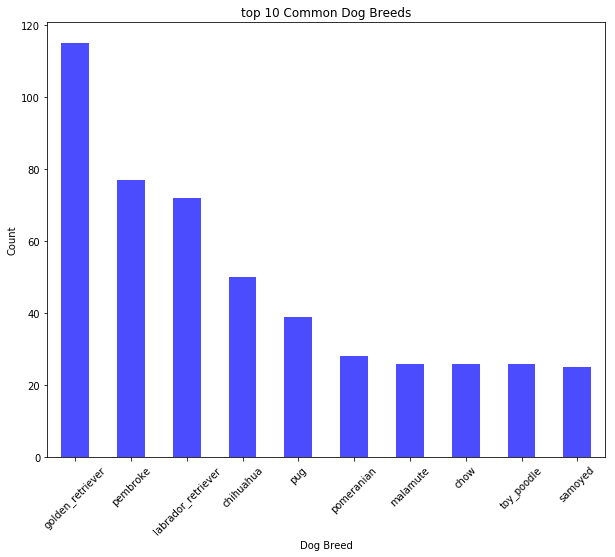

In [92]:
#plot the top 10 common dog breed in a bar chart
top_10_breeds = final_df['dog_breed'].value_counts().head(10)

plt.figure(figsize = [10,8])
top_10_breeds.plot(kind = 'bar', color='b', alpha = 0.7)
plt.title('top 10 Common Dog Breeds')
plt.xlabel('Dog Breed')
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.show()

In [93]:
#group by dog_breed and sum favorite_count
breed_favorite = final_df.groupby('dog_breed')['favorite_count'].sum()
top_10_favorite = breed_favorite.sort_values(ascending = False).head(10)
print(top_10_favorite)

dog_breed
golden_retriever      1410664
pembroke               946224
labrador_retriever     733755
chihuahua              457182
french_bulldog         372420
samoyed                358289
chow                   290745
cocker_spaniel         259150
pug                    224280
malamute               223327
Name: favorite_count, dtype: int64


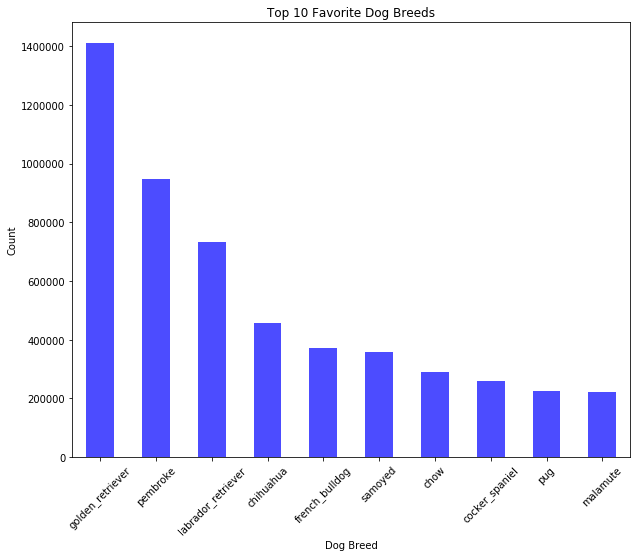

In [94]:
#plot a bar chart of top 10 favorite breed
plt.figure(figsize = [10,8])
top_10_favorite.plot(kind = 'bar', color='b', alpha = 0.7)
plt.title('Top 10 Favorite Dog Breeds')
plt.xlabel('Dog Breed')
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.show()

In [96]:
#create a dataframe that has data of dog breed counts and dog breed favorite tweet counts
df_breed_counts = final_df['dog_breed'].value_counts().reset_index()
df_breed_counts.columns = ['dog_breed', 'dog_breed_counts']

df_breed_favorite_counts = final_df.groupby('dog_breed')['favorite_count'].sum().reset_index()
df_breed_favorite_counts.columns = ['dog_breed', 'dog_breed_favorite_counts']

df_breed_stats = pd.merge(df_breed_counts, df_breed_favorite_counts, on = 'dog_breed')

In [97]:
df_breed_stats.head()

,dog_breed,dog_breed_counts,dog_breed_favorite_counts
0,golden_retriever,115,1410664
1,pembroke,77,946224
2,labrador_retriever,72,733755
3,chihuahua,50,457182
4,pug,39,224280


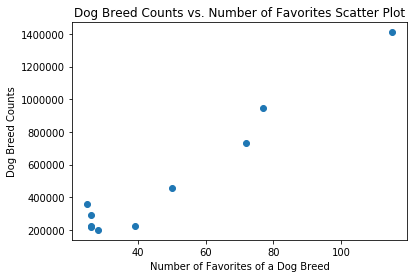

In [100]:
import seaborn as sns

# Selecting the top 10 breeds
top_10_breeds = df_breed_stats.nlargest(10, 'dog_breed_counts')

plt.scatter(top_10_breeds['dog_breed_counts'], top_10_breeds['dog_breed_favorite_counts'])
plt.xlabel('Number of Dog Breed Counts')
plt.ylabel('Number of Favorite tweets')
plt.title('Dog Breed Counts vs. Number of Favorites Tweets Scatter Plot')

# Save the figure
plt.savefig('breed_counts_vs_favorites.png',bbox_inches='tight')
plt.show()

### Insights:
1. Golden Retriever is the most common dog breed

2. Golden Retriever is also the most favorite dog breed

3. There is a relation between the number dog breed counts and the number of favorite counts. There are more golden retriever than other dog breeds. They are also get the most favorite. The more counts they show up on tweeter, the more favorite they get.

### Visualization

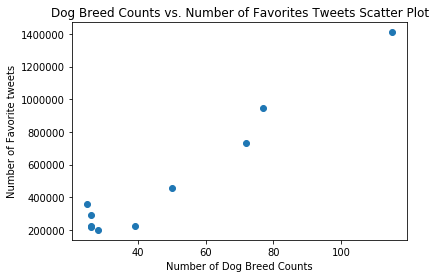

In [101]:
import seaborn as sns

# Selecting the top 10 breeds
top_10_breeds = df_breed_stats.nlargest(10, 'dog_breed_counts')

plt.scatter(top_10_breeds['dog_breed_counts'], top_10_breeds['dog_breed_favorite_counts'])
plt.xlabel('Number of Dog Breed Counts')
plt.ylabel('Number of Favorite tweets')
plt.title('Dog Breed Counts vs. Number of Favorites Tweets Scatter Plot')

# Save the figure
plt.savefig('breed_counts_vs_favorites.png',bbox_inches='tight')
plt.show()